#  Google Play Store Apps

This information is scraped from the Google Play Store and the dataset is available on Kaggle. This dataset contains 2 files. First file contains information of around 10k+ apps. Second File contains 100 most relevant reviews for the apps. Since the Play Store apps data has enormous potential to drive app-making businesses to success, We will try to explore this data and draw actionable insights for developers to work on and capture the Android market!

It has the following features:
- App            (Object type) : It has the name of App
- Category       (Object type) : Category app belongs to
- Rating         (Float type)  : Rating of the app
- Reviews        (Object type) : Total no. of reviews app has
- Size           (Object type) : Size of an app
- Installs       (Object type) : Total no. od times app has been installed
- Type           (Object type) : Free or a paid app
- Price          (Object type) : Price of an app
- Content Rating (Object type) : Audience type to rate the content of an app
- Genres         (Object type) : App Genre 
- Last Updated   (Object type) : When it was last updated
- Current Ver    (Object type) : Current Version of the app
- Android Ver    (Object type) : Android version which can access the app

##  DATA OVERVIEW

In [480]:
# Importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [445]:
# Load the data

df = pd.read_csv('googleplaystore.csv/googleplaystore.csv')

In [446]:
# Check the size of data

df.shape

(10841, 13)

We have total 13 features and 10,841 rows in our dataset .

In [447]:
# data.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


We have all the features in our dataset which are object type. Only Rating is float type column.

##   DATA PROCESSING

###  Null-Value Treatment

In [448]:
# Check for Null values

df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [449]:
# Dropping null values for columns with few null values

df.dropna(subset=['Type','Content Rating','Current Ver','Android Ver'],inplace=True)

In [450]:
# Check null values again

df.isnull().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [451]:
# Replacing Null values for rating according to category mean of rating to which the apps belong

df['Rating'] = df.groupby('Category')['Rating'].apply(lambda x:x.fillna(x.mean()))

In [452]:
# Check null values

df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

###   Data Cleaning

In [453]:
# Check duplicates

df.duplicated().value_counts()

False    10346
True       483
dtype: int64

In [454]:
# Drop duplicated values

df.drop_duplicates(keep='first',inplace=True)

In [455]:
# Define function to convert size column from KB to MB

def convert(x):
    if x[-1]=='M':
        a = np.float(x.replace('M',''))*1
    elif x[-1]=='k':
        a = np.float(x.replace('k',''))*0.001
    else:
        a = x
    return(a)

In [456]:
# Convert Size column to MB
# Replace varies with device with mean values category-wise size
# Convert column to int type

df['Size'] = df.Size.apply(convert)
df['Size'] = df['Size'].replace('Varies with device',0)
df['Size'] = df.groupby('Category')['Size'].apply(lambda x:x.replace(0,x.mean()))

In [457]:
# Convert installs to int type

df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')
df['Installs'] = df['Installs'].astype(int)

In [458]:
# Convert Reviews column to int type

df['Reviews'] = df['Reviews'].astype(int)

In [459]:
# Convert Price column to float type

df['Price'] = df['Price'].str.replace('$','')
df['Price'] = df['Price'].astype(float)

In [460]:
# Create a dictionary to transform Android version column

ver_dict = {'1.0 and up'  :1,  '1.5 and up' :2,  '1.6 and up':3,  '2.0 and up' :4,   '2.0.1 and up' :5,
            '2.1 and up'  :6,  '2.2 - 7.1.1':7,  '2.2 and up':8,  '2.3 and up' :9,   '2.3.3 and up' :10,
            '3.0 and up'  :11, '3.1 and up' :12, '3.2 and up':13, '4.0 and up' :14,  '4.0.3 - 7.1.1':15,
            '4.0.3 and up':16, '4.1 - 7.1.1':17, '4.1 and up':18, '4.2 and up' :19,  '4.3 and up'   :20,
            '4.4 and up'  :21, '4.4W and up':22, '5.0 - 6.0' :23, '5.0 - 7.1.1':24,  '5.0 - 8.0'    :25,
            '5.0 and up'  :26, '5.1 and up' :27, '6.0 and up':28, '7.0 - 7.1.1':29,  '7.0 and up'   :30, 
            '7.1 and up'  :31, '8.0 and up' :32, 'Varies with device':33}

In [461]:
# Map ver_dict to Android version column

df['Android Ver'] = df['Android Ver'].map(ver_dict)

In [462]:
# Extract month and year from Last updated and drop last updated

df['Year']  = df['Last Updated'].apply(lambda x : x[-4:])
df['Month'] = df['Last Updated'].apply(lambda x : x[:-8])
df.drop('Last Updated',axis=1,inplace=True)

In [463]:
# Create dictionary to transform month

month_dict = {'January' : 1, 'February' : 2, 'March'     : 3, 'April'   : 4,  'May'      : 5,  'June'     : 6,
              'July'    : 7,  'August'  : 8, 'September' : 9, 'October' : 10, 'November' : 11, 'December' : 12,
              'January ': 1, 'February ': 2, 'March '    : 3, 'April '  : 4,  'May '     : 5,  'June '    : 6,
              'July '   : 7,  'August ' : 8, 'September ': 9, 'October ': 10, 'November ': 11, 'December ': 12}

In [464]:
# Drop year and month column and make a new last updated column

df['Month'] = df['Month'].map(month_dict)
df['Last Updated']  = df['Month'].map(str)+'-'+df['Year'].map(str)

In [465]:
# Drop Genre column because it has almost same information as category column
# Drop year and month column as it has same information as last updated column

df.drop('Genres',axis=1,inplace=True)
df.drop(['Month','Year'],axis=1,inplace=True)

In this part, we majorly did the basic data cleaning for the dataset. Since we do not have much numerical columns on which we can apply a relevant model, we have tried to convert some columns into numerical by careful relationship with the original values based logic. 

## EXPLORATORY DATA ANALYSIS

In [466]:
# Print categorical and numerical columns

print('Numerical columns in data :',list(df.select_dtypes(include=['int','float','float64','int64']).columns))
print('Categorical columns       :',list(df.select_dtypes(include='object').columns))

Numerical columns in data : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Android Ver']
Categorical columns       : ['App', 'Category', 'Type', 'Content Rating', 'Current Ver', 'Last Updated']


In [467]:
# Print count of unique values in categorical columns

print('Category counts        :',len(df['Category'].value_counts()))
print('Type counts            :',len(df['Type'].value_counts()))
print('Content Rating counts  :',len(df['Content Rating'].value_counts()))
print('Last updated counts    :',len(df['Last Updated'].value_counts()))
print('Current Ver            :',len(df['Current Ver'].value_counts()))

Category counts        : 33
Type counts            : 2
Content Rating counts  : 6
Last updated counts    : 88
Current Ver            : 2831


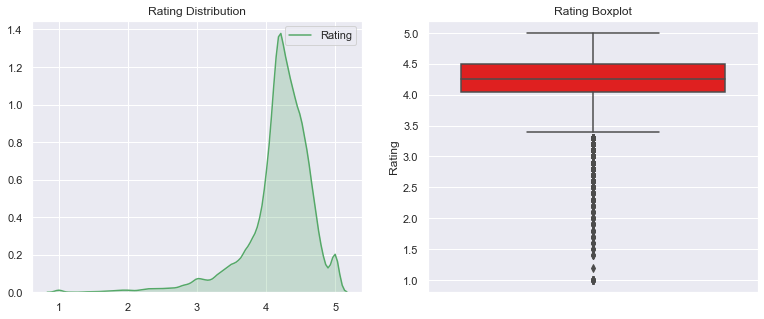

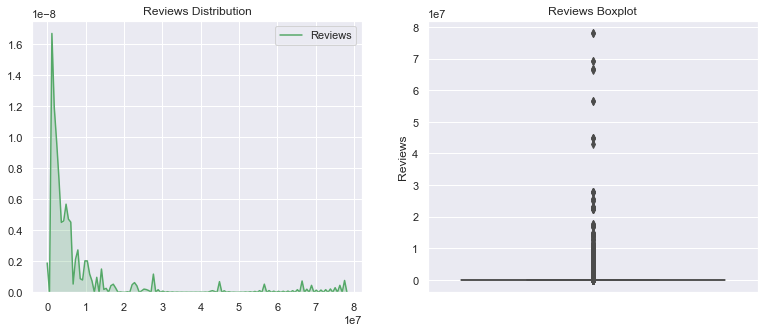

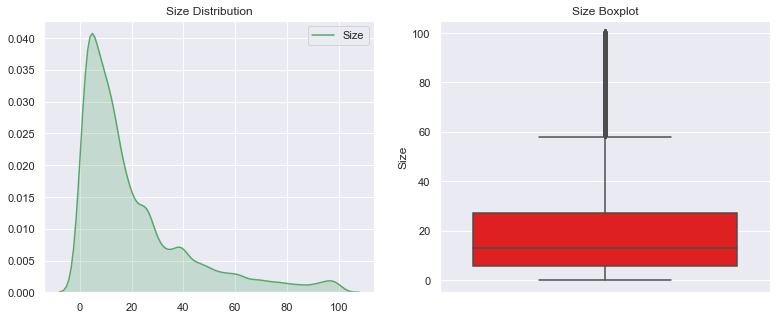

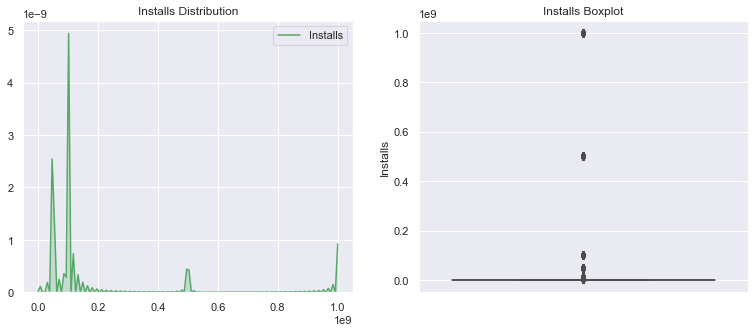

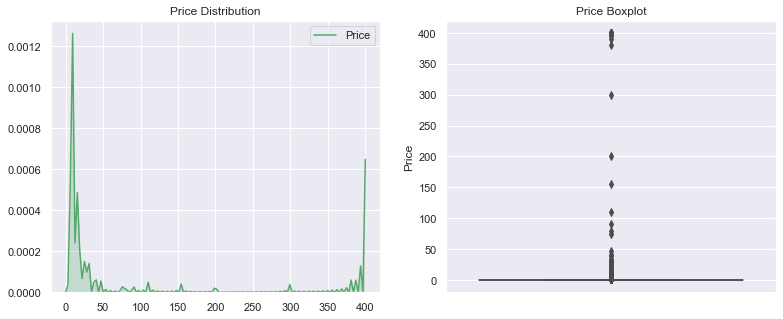

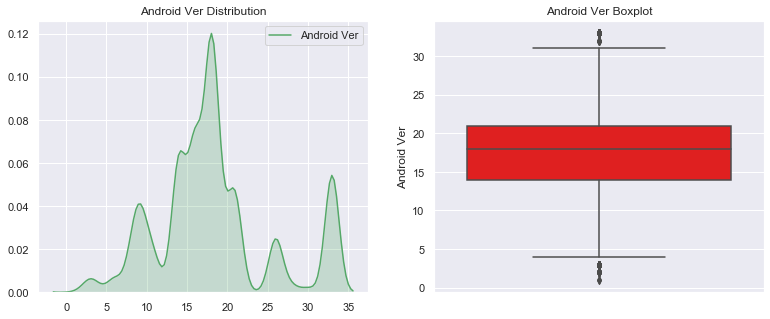

In [468]:
for i in ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Android Ver']:
    sns.set(style='darkgrid')
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[i],shade=True,color='g')
    plt.title(i+' Distribution')

    plt.subplot(122)
    sns.boxplot(y = df[i],color='red')
    plt.title(i+' Boxplot')
    plt.show()

Looking at the distributions and boxplots of our numerical variables, we observe that:
1. Most of the apps have a higher rating and their are a large number of outliers on the lower end, which makes our distribution left-skewed.
2. From the reviews distribution, we observe that people have generally given less number of reviews for all the apps, and very few apps have a lot of reviews. There are thus, large number of outliers on the upper end.
3. Size distribution of the apps depicts that most of the apps have size less than 20MB and very few apps have a size of upto 100 MB. Those are the outliers.
4. Most apps have lesser amount of audience. Also, this could depict people have different preferences, hence on average, no of installations of most apps are similar but the audience varies.
5. Most of the apps are free or have a minimal fee, very few of them have a higher cost.
6. Most apps have a android version higher than 4.0.0, probably that could be around when smartphones bacame popular and cheap and easily accessible for mass crowds.

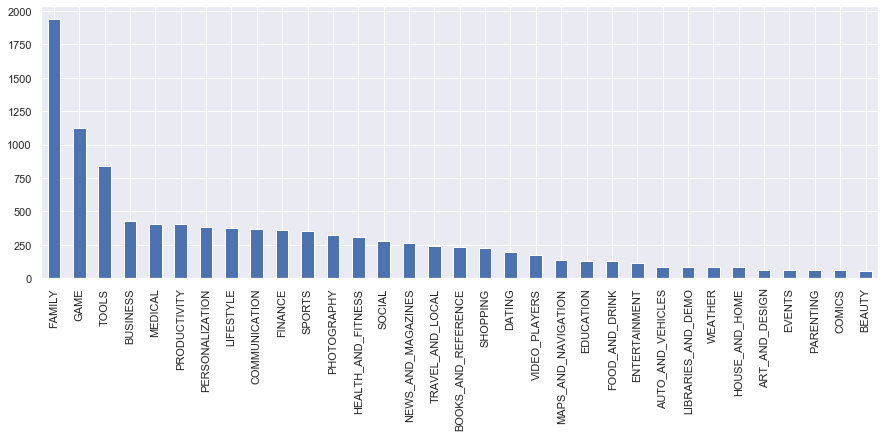

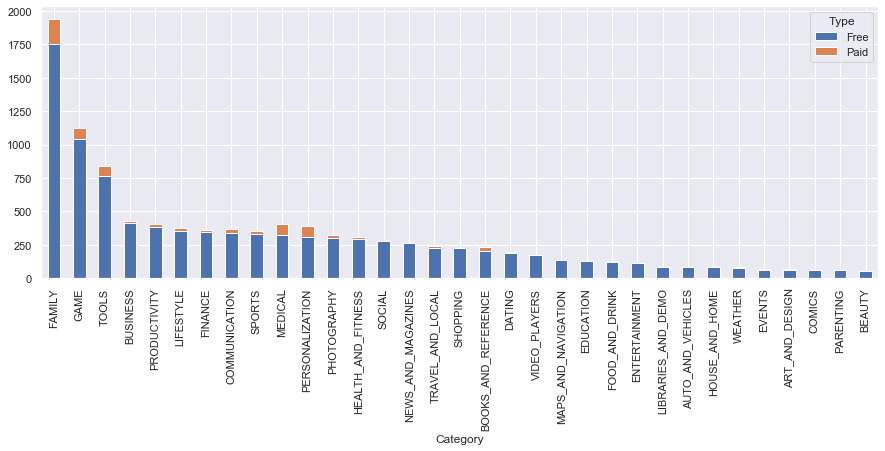

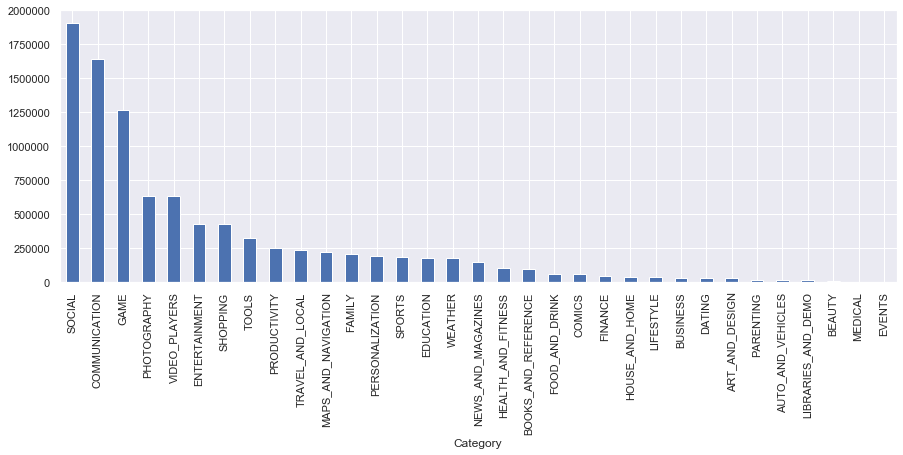

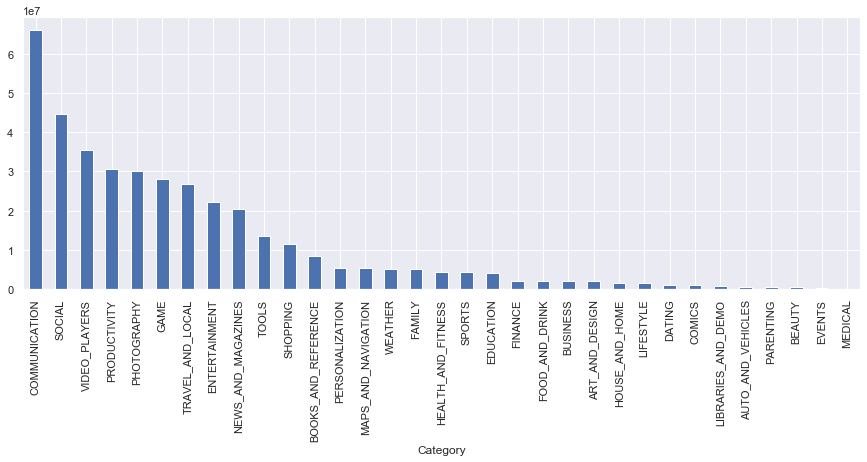

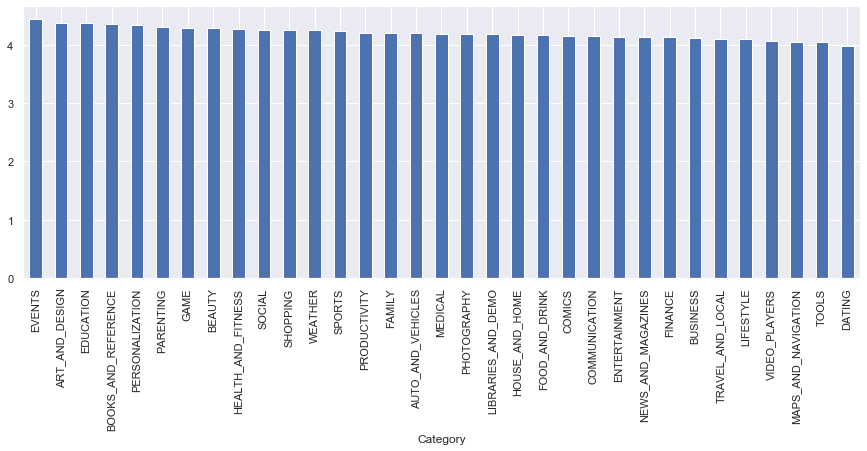

In [469]:
df['Category'].value_counts().plot.bar(figsize=(15,5))
plt.show()
pd.crosstab(df['Category'],df['Type']).sort_values(by='Free',ascending=False).plot.bar(stacked=True,figsize=(15,5))
plt.show()
df.groupby('Category').mean()['Reviews'].sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.show()
df.groupby('Category').mean()['Installs'].sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.show()
df.groupby('Category').mean()['Rating'].sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.show()

Observations :
1. We can infer that maximum apps that are launched belong to the Family category, followed by Games, tools, business, medical and the others. 
2. Very few apps charge money for the usage. Most of the apps are free.
3. Highest number of reviews that have been given on the app belong to the category of Social, communication, game, photography and video_players apps.
4. Similar to the reviews, highest number of downloads are for the apps which belong to ctaegories - communication, social, video_players, productivity, photography and games.
5. There isn't much difference in the average rating for all the categories.

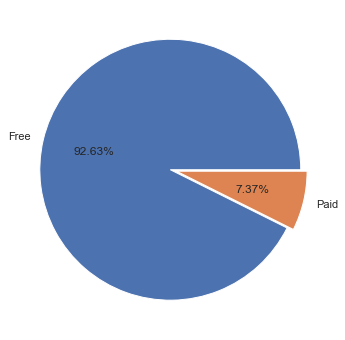

In [470]:
plt.figure(figsize=(6,6))
plt.pie(df['Type'].value_counts(),labels=df['Type'].value_counts().index,autopct='%1.2f%%',explode=[0,0.05])
plt.show()

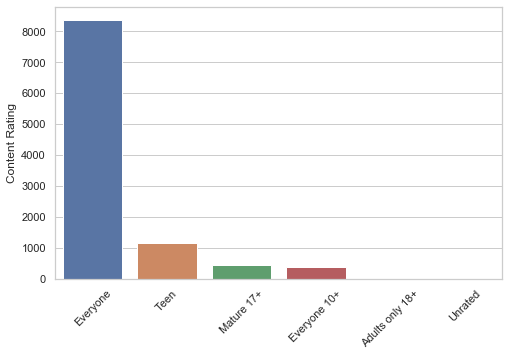

In [471]:
plt.figure(figsize=(8,5))
sns.set(style='whitegrid')
x = df['Content Rating'].value_counts().sort_values(ascending=False)
sns.barplot(x.index,x)
plt.xticks(rotation=45)
plt.show()

In [472]:
df['Content Rating'].value_counts()

Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

There are not much inferences we get from the value counts for this column. Since maximum values lie in the column which says 'everyone', its hard to figure out which category in particular is more responsive for giving the feedback. Although, we can make out that teens also give feedback for a lot of apps, so they could be one category to target when products are comparatively new as it would help in generating better reviews and improvizations for the product.

###   Note : 
1. I tried to perform clustering using different ways of removing some columns leading to high dimensionality or even by removing them to check if the performance improves or if there are some additional insights. But none of the techniques generate any informative results. So, haven't presented that part here.